# 회귀분석 10장 연습문제R
> 연습문제 10-2,4,5,7 R 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["R", "회귀분석"]

# 10.2)

예제 10.2의 가정된 모형에서 교호작용 효과에 대한 검정결과 유의하지 않게 판정되었다. 교호작용이 없는 모형

$y_j=\beta_0+\beta_1x_{1j}+\beta_2x_{2j}+\epsilon_j$

를 가정하고 분산분석표를 작성하여 예의 결과와 비교하여라

## 예제 10.2)

다음 자료는 새로운 제조방법$(x_2)$ A, B에 의하여 제조된 벨트 16개에 충격$(x_1)$을 가한 후 수명을 조사한 것이다.

|일련번호|$y$(수명)|$x_1$(충격)|$x_2$(제조방법)|
|:---:|:---:|:---:|:---:|
|1|18|61|A|
|2|17.4|72|A|
|3|14.5|85|A|
|4|14|84|A|
|5|13.4|98|A|
|6|24.4|53|A|
|7|22.7|54|A|
|8|12.7|89|A|
|9|27.1|77|B|
|10|25.4|88|B|
|11|33.5|76|B|
|12|35.6|59|B|
|13|26.1|91|B|
|14|36.8|65|B|
|15|34.9|81|B|
|16|43.6|51|B|

In [1]:
EX102 <- read.csv("10dot2.csv",header=T)

In [2]:
EX102[,"manu1"] <- c(0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1)

In [3]:
head(EX102)

,num,life,work,manu,manu1
,<int>,<dbl>,<int>,<chr>,<dbl>
1,1,18.0,61,A,0
2,2,17.4,72,A,0
3,3,14.5,85,A,0
4,4,14.0,84,A,0
5,5,13.4,98,A,0
6,6,24.4,53,A,0


In [4]:
attach(EX102)

In [5]:
gyo <- work*manu1
gyo

[1]  0  0  0  0  0  0  0  0 77 88 76 59 91 65 81 51

In [6]:
fit1 <- lm(life~work+manu1)

In [7]:
fitgyo <- lm(life~work+manu1+gyo)

In [8]:
summary(fitgyo)


Call:
lm(formula = life ~ work + manu1 + gyo)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3938 -1.1350  0.0171  1.6701  4.9848 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.16364    4.31882   8.142 3.14e-06 ***
work        -0.24196    0.05669  -4.268  0.00109 ** 
manu1       26.71723    6.71235   3.980  0.00183 ** 
gyo         -0.15268    0.08916  -1.712  0.11252    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.557 on 12 degrees of freedom
Multiple R-squared:  0.9441,	Adjusted R-squared:  0.9301 
F-statistic: 67.56 on 3 and 12 DF,  p-value: 8.73e-08


In [9]:
anova(fitgyo)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
work,1,353.81512,353.815123,54.132838,8.764291e-06
manu1,1,951.69664,951.696636,145.607229,4.545839e-08
gyo,1,19.16497,19.164974,2.932194,1.125250e-01
Residuals,12,78.43264,6.536053,NA,NA


연습문제와의 비교

In [10]:
summary(fit1)


Call:
lm(formula = life ~ work + manu1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7121 -1.5151 -0.1434  1.3539  4.3026 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.76136    3.62542  10.967 6.10e-08 ***
work        -0.30368    0.04689  -6.476 2.08e-05 ***
manu1       15.43382    1.37079  11.259 4.47e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.74 on 13 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9197 
F-statistic: 86.95 on 2 and 13 DF,  p-value: 2.987e-08


In [11]:
anova(fit1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
work,1,353.81512,353.815123,47.12817,1.144082e-05
manu1,1,951.69664,951.696636,126.76597,4.471157e-08
Residuals,13,97.59762,7.507509,NA,NA


연습문제에서 적합한 모형은

$ \hat{y} = 39.76136 -0.30368x_1 + 15.43382x_2$ 이다.

예제의 모형에서 교호작용효과를 무시할 수 있다고 결론 내렸으므로 연습문제의 적합이 적절하다.

______________

# 10.4)

다음 자료에 대하여

|x|y|
|:---:|:---:|
|2.5|65|
|4.4|34|
|4.5|40|
|1.4|80|
|4.7|30|
|3.5|57|
|2.5|72|
|3.8|48|

### 1) y의 x에 대한 산점도를 그려보고 몇 개의 구간으로 나누어 분석하면 좋은지를 설명하고 어떤 점$(x_p)$에서 나누는 것이 좋은지를 설명하여라.

In [12]:
EX104 <- read.csv("104.csv",header=T)
attach(EX104)

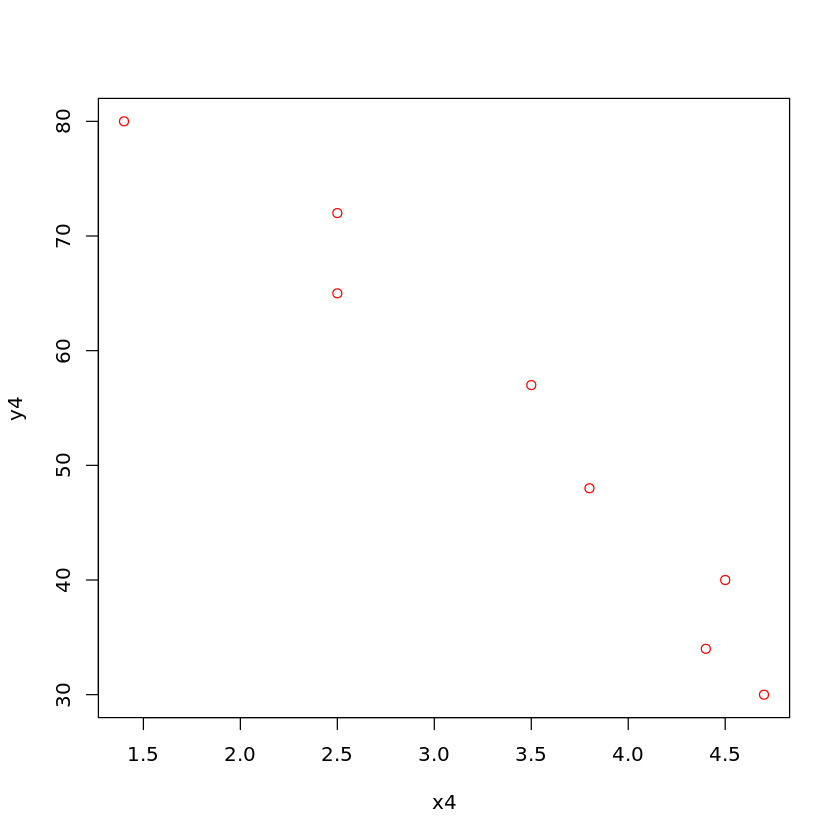

In [33]:
plot(x4,y4,col="red")

$x_p = 3.8$ 에서 나누는것이 좋아보인다.

### 2) 위 자료를 두 구간으로만 나누려고 한다면 어떤 점$(x_p)$에서 나누는 것이 좋은지를 설명하고 그 점을 경계로 하여 다음 모형을 적합시켜 보아라.

$y_j = \beta_0 + \beta_1x_{1j} + \beta_2(x_{1j}-x_p)x_{2j}+\epsilon_j$

$x_{2j} = 1, 만약 x_{1j} > x_p 이면$

$x_{2j} = 0, 만약 x_{1j} \leq x_p 이면$

In [27]:
x4_2 <- function(x4) ifelse(x4>3.8,1,0)

In [28]:
x4_2(x4)

[1] 0 1 1 0 1 0 0 0

In [30]:
EX104[,"x4_"] = (x4-3.8)*x4_2(x4)
EX104$x4_

[1] 0.0 0.6 0.7 0.0 0.9 0.0 0.0 0.0

In [31]:
fit104 <- lm(y4~x4+x4_,data=EX104)

In [32]:
summary(fit104)


Call:
lm(formula = y4 ~ x4 + x4_, data = EX104)

Residuals:
     1      2      3      4      5      6      7      8 
-2.421 -3.663  4.531 -1.462 -1.082  2.344  4.579 -2.826 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   99.333      5.907  16.817 1.36e-05 ***
x4           -12.765      2.046  -6.238  0.00155 ** 
x4_           -9.173      6.201  -1.479  0.19911    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.939 on 5 degrees of freedom
Multiple R-squared:  0.9668,	Adjusted R-squared:  0.9535 
F-statistic: 72.71 on 2 and 5 DF,  p-value: 0.0002015


> $ \hat{y} = 99.333 -12.765x_1 -9.173x_2$ 을 추정할 수 있다.

### 3) 귀무가설 $H_0 : \beta_2 = 0$, 대립가설 $H_1 : \beta_2 \neq 0 $ 를 유의수준 0.05로 검정하여라.

In [34]:
anova(fit104)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x4,1,2221.98174,2221.98174,143.230386,7.182332e-05
x4_,1,33.95155,33.95155,2.188539,1.991072e-01
Residuals,5,77.56670,15.51334,NA,NA


p-value 가 0에 근접하여 영가설을 기각한다. 즉, $\beta_2$ 는 0이아니라는 것을 알 수 있다.

__________

# 10.5)

다음의 자료는 모든 조건이 같은 60마리의 실험용 동물을 각각 30마리씩 두 그룹으로 나누어 한 그룹에 A, 또 다른 그룹에는 B의 안정제를 $5, 10, 20mg$ 씩 투약했을 때 관찰된 불안도$(y)$이다. $y, x_1,x_2$를 각각 불안도, 약의 복용량, 약의 종류라고 하고 다음 질문에 답하여라. 

|     |  5 |    | 10 |    | 20 |    |
|:---:|:--:|:--:|:--:|:--:|:--:|:--:|
| (A) | 15 | 16 | 18 | 16 | 20 | 17 |
| (A) | 16 | 15 | 17 | 15 | 19 | 18 |
| (A) | 18 | 16 | 18 | 19 | 21 | 21 |
| (A) | 13 | 17 | 19 | 18 | 18 | 20 |
| (A) | 19 | 15 | 20 | 16 | 19 | 17 |
| (B) | 16 | 15 | 19 | 18 | 24 | 23 |
| (B) | 17 | 15 | 21 | 20 | 25 | 24 |
| (B) | 18 | 18 | 22 | 21 | 23 | 22 |
| (B) | 17 | 17 | 23 | 22 | 25 | 26 |
| (B) | 15 | 16 | 20 | 19 | 25 | 24 |

### 1) 지시변수를 이용하여 자료에 대한 적절한 모형을 설정하여라.

4.24-0.013x

In [3]:
EX105 <- read.csv("105.csv",header = T)

In [4]:
EX105

dosage,unrest,kind,kindn
<int>,<int>,<chr>,<int>
5,15,A,0
5,16,A,0
5,16,A,0
5,15,A,0
5,18,A,0
5,16,A,0
5,13,A,0
5,17,A,0
5,19,A,0


In [5]:
one <- rep(1,length(EX105$kind))

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [7]:
X105 <- matrix(c(one,EX105$dosage,EX105$kindn),length(EX105$kind),3)

In [8]:
y105 <- matrix(c(EX105$unrest),length(EX105$unrest),1)

In [9]:
solve(t(X105)%*%X105)%*%t(X105)%*%y105

13.6333333
0.3342857
3.1333333


### 2) (1)의 모형을 최소제곱법에 의해 추정하고 분산분석표를 작성하여라.

In [10]:
fit105 <- lm(EX105$unrest~EX105$dosage+EX105$kindn)

In [11]:
summary(fit105)


Call:
lm(formula = EX105$unrest ~ EX105$dosage + EX105$kindn)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4381 -1.3488 -0.1095  1.1548  3.8905 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.63333    0.57751  23.607  < 2e-16 ***
EX105$dosage  0.33429    0.03949   8.465 1.17e-11 ***
EX105$kindn   3.13333    0.49251   6.362 3.65e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.907 on 57 degrees of freedom
Multiple R-squared:  0.663,	Adjusted R-squared:  0.6512 
F-statistic: 56.07 on 2 and 57 DF,  p-value: 3.447e-14


In [13]:
anova(fit105)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
EX105$dosage,1,260.7429,260.742857,71.66357,1.165330e-11
EX105$kindn,1,147.2667,147.266667,40.47534,3.647996e-08
Residuals,57,207.3905,3.638429,NA,NA


### 3) 자료에 $y=\beta_0+\beta_1x_1+\beta_2x_2+\epsilon$를 적합시키고 회귀선을 추정하여라.

$ \to b_0 = 13.63 , b_1 = 0.3343 , b_2 = 3.133 $

반응 함수는 $\hat{y} = 13.63 + 0.3343x_1 + 3.133x_2 $ 이다.

이 결과는 많은양 복용시 불안도가 올라가고, B의 안정제의 불안도가 3정도 더 높다는 것을 보여준다.  

### 4) 교호작용이 있는지 검정하여라. $\alpha = 0.05$

In [19]:
EX105[,"inter"] <- EX105$dosage * EX105$kindn

In [21]:
fit105int <- lm(EX105$unrest~EX105$dosage+EX105$kindn+EX105$inter)

In [22]:
summary(fit105int)


Call:
lm(formula = EX105$unrest ~ EX105$dosage + EX105$kindn + EX105$inter)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2571 -1.2250 -0.1714  0.9357  4.1286 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15.30000    0.65419  23.388  < 2e-16 ***
EX105$dosage  0.19143    0.04945   3.871 0.000286 ***
EX105$kindn  -0.20000    0.92516  -0.216 0.829634    
EX105$inter   0.28571    0.06994   4.085 0.000142 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.689 on 56 degrees of freedom
Multiple R-squared:  0.7404,	Adjusted R-squared:  0.7265 
F-statistic: 53.23 on 3 and 56 DF,  p-value: < 2.2e-16


$\to kindn$ 의 pvalue가 상당히 크게 측정되어 교호작용은 없는것으로 판단된다.

________

# 10.7)

다음 자료는 어느 초등 학교에서 안경을 쓴 학생들을 학년별로 조사한 자료이다.

| 학년별 | 1 | 2 | 3 | 4 | 5 | 6 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| 전체학생수 | 250 | 252 | 151 | 204 | 202 | 195 |
| 안경착용수 | 15 | 20 | 18 | 25 | 32 | 40 |

### 1)로지스틱 반응함수를 추정하여라.

In [35]:
EX107 <- read.csv("107.csv",header=T)
attach(EX107)

In [36]:
head(EX107)

,grade,student,glasses
,<int>,<int>,<int>
1,1,250,15
2,2,252,20
3,3,151,18
4,4,204,25
5,5,202,32
6,6,195,40


In [46]:
EX107[,"P"] <- glasses/student
EX107

grade,student,glasses,P
<int>,<int>,<int>,<dbl>
1,250,15,0.06000000
2,252,20,0.07936508
3,151,18,0.11920530
4,204,25,0.12254902
5,202,32,0.15841584
6,195,40,0.20512821


In [37]:
logit <- function(x) log(x/(1-x))

In [53]:
EX107[,"Pstar"] <- logit(EX107$P)
EX107

grade,student,glasses,P,Pstar
<int>,<int>,<int>,<dbl>,<dbl>
1,250,15,0.06000000,-2.751535
2,252,20,0.07936508,-2.451005
3,151,18,0.11920530,-1.999977
4,204,25,0.12254902,-1.968510
5,202,32,0.15841584,-1.670063
6,195,40,0.20512821,-1.354546


In [77]:
temp = 0
for (i in 1:6){
    temp = EX107$student[i]*EX107$P[i]*(1-EX107$P[i])
    print(temp)
}

[1] 14.1
[1] 18.4127
[1] 15.8543
[1] 21.93627
[1] 26.93069
[1] 31.79487


In [78]:
a <- c(14.1,0,0,0,0,0)
b <- c(0,18.4127,0,0,0,0)
c <- c(0,0,15.8543,0,0,0)
d <- c(0,0,0,21.93627,0,0)
e <- c(0,0,0,0,26.93069,0)
f <- c(0,0,0,0,0,31.79487)

In [81]:
W <- matrix(c(a,b,c,d,e,f),6,6)
W

14.1,0.0000,0.0000,0.00000,0.00000,0.00000
0.0,18.4127,0.0000,0.00000,0.00000,0.00000
0.0,0.0000,15.8543,0.00000,0.00000,0.00000
0.0,0.0000,0.0000,21.93627,0.00000,0.00000
0.0,0.0000,0.0000,0.00000,26.93069,0.00000
0.0,0.0000,0.0000,0.00000,0.00000,31.79487


In [83]:
X <- matrix(c(1,1,1,1,1,1,array(student)),6,2)
X

1,250
1,252
1,151
1,204
1,202
1,195


In [84]:
Xt <- t(X)

In [85]:
pmat <- matrix(c(array(EX107$Pstar)),6,1)
pmat

-2.751535
-2.451005
-1.999977
-1.968510
-1.670063
-1.354546


In [86]:
solve(Xt%*%W%*%X) %*% Xt %*%W %*% pmat

0.038849649
-0.009442624


$\beta_0 = 0.0388 , \beta_1 = -0.00944 $

$ \hat{p^{*}} =0.0388 -0.00944student $ 이다.

### 2)새로 전학해 올 네 학생이 안경을 착용할 확률은?

In [87]:
0.0388 -0.00944* 4

[1] 0.00104

### 3) $\hat{p}^{*}$를 $x$에 대하여 도시하고 로지스틱 반응함수를 적합시키는 것이 타당한지를 검토하여라.

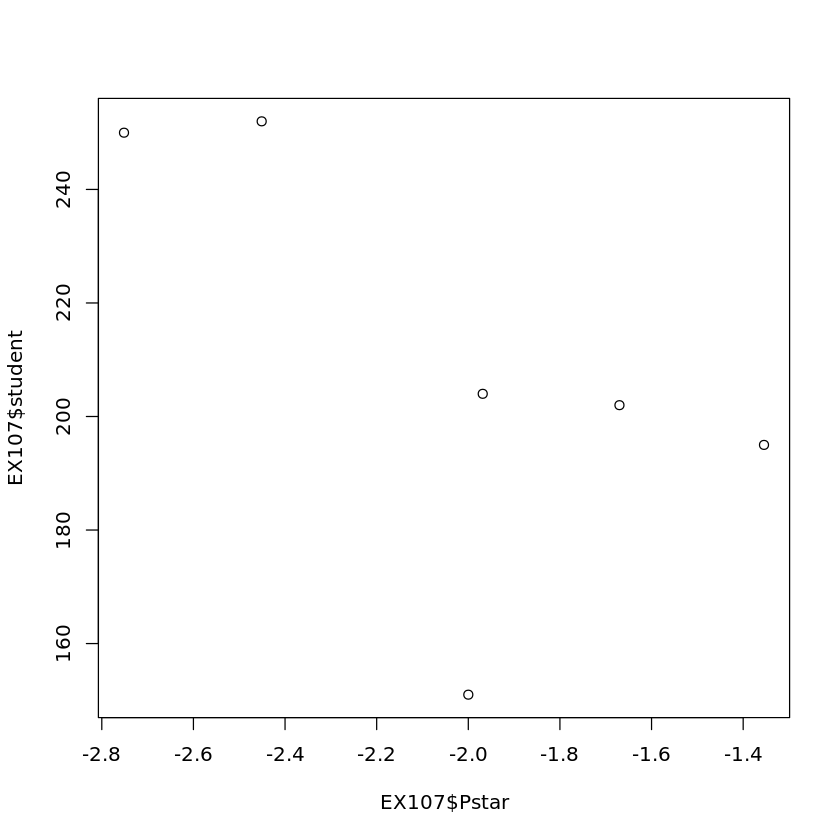

In [88]:
plot(EX107$Pstar,EX107$student)

타당하지 않다.